-------FUNCTIONS------

Display Population on map

In [3]:
def display_population(population):

    plt.close()

    # Create a 3D scatter plot with colors representing the values of the array
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    indices = np.argwhere(data < minimum_bs)

    #scatter obstacles (dont display free space as too much computation)
    ax.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='x')

    try:
        for individual in population:

            individual.insert(0,start_point)

            individual_full=individual.copy()

            ax.plot(*zip(*individual_full))

        plt.show
    except:
        pass

    # Plot the start and end points
    ax.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
    ax.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)

    #set axes limits
    ax.set_xlim3d(0, data.shape[0])
    ax.set_ylim3d(0, data.shape[1])
    ax.set_zlim3d(0, data.shape[2])

    #set axes labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


Post-Processing (Attempt all permuations  : 2^(n-2))

In [4]:
def post_processing(initial_solution):

    permutations = get_permutations(initial_solution)

    fitnesses = []

    permutations.append(initial_solution)
    
    for individual in permutations:

        fitness=fitness_test(individual)

        fitnesses.append(fitness)

    max_index = fitnesses.index(max(fitnesses))

    max_fitness=fitnesses[max_index]
    final_solution=permutations[max_index]

    return max_fitness,final_solution

Extract gridcells along route: 3D

[(40, 4, 79), (39, 4, 78), (39, 5, 77), (38, 5, 76), (38, 5, 75), (37, 6, 74), (37, 6, 73), (36, 6, 72), (36, 7, 71), (35, 7, 70), (35, 7, 69), (34, 8, 68), (34, 8, 67), (33, 8, 66), (32, 9, 65), (32, 9, 64), (31, 9, 63), (31, 10, 62), (30, 10, 61), (30, 10, 60), (29, 10, 59), (29, 11, 58), (28, 11, 57), (28, 11, 56), (27, 12, 55), (26, 12, 54), (26, 12, 53), (25, 13, 52), (25, 13, 51), (24, 13, 50), (24, 14, 49), (23, 14, 48), (23, 14, 47), (22, 15, 46), (22, 15, 45), (21, 15, 44), (21, 16, 43), (20, 16, 42), (19, 16, 41), (19, 17, 40), (18, 17, 39), (18, 17, 38), (17, 18, 37), (17, 18, 36), (16, 18, 35), (16, 19, 34), (15, 19, 33), (15, 19, 32), (14, 20, 31), (14, 20, 30), (13, 20, 29), (12, 21, 28), (12, 21, 27), (11, 21, 26), (11, 22, 25), (10, 22, 24), (10, 22, 23), (9, 22, 22), (9, 23, 21), (8, 23, 20), (8, 23, 19), (7, 24, 18), (6, 24, 17), (6, 24, 16), (5, 25, 15), (5, 25, 14), (4, 25, 13), (4, 26, 12), (3, 26, 11), (3, 26, 10), (2, 27, 9), (2, 27, 8), (1, 27, 7), (1, 28, 6), (

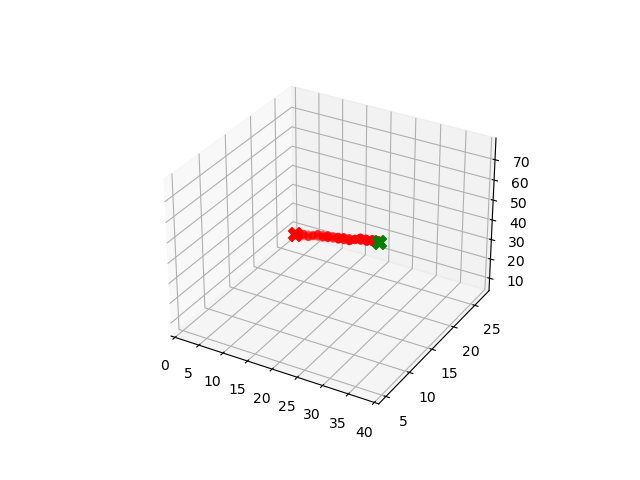

In [5]:
def bresenham_line_3d(x1, y1, z1, x2, y2, z2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dz = abs(z2 - z1)
    x, y, z = x1, y1, z1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    sz = -1 if z1 > z2 else 1
    if dx >= max(dy, dz):
        err_1 = dy - dx / 2
        err_2 = dz - dx / 2
        while x != x2:
            yield (x, y, z)
            if err_1 >= 0:
                y += sy
                err_1 -= dx
            if err_2 >= 0:
                z += sz
                err_2 -= dx
            err_1 += dy
            err_2 += dz
            x += sx
    elif dy >= max(dx, dz):
        err_1 = dx - dy / 2
        err_2 = dz - dy / 2
        while y != y2:
            yield (x, y, z)
            if err_1 >= 0:
                x += sx
                err_1 -= dy
            if err_2 >= 0:
                z += sz
                err_2 -= dy
            err_1 += dx
            err_2 += dz
            y += sy
    else:
        err_1 = dy - dz / 2
        err_2 = dx - dz / 2
        while z != z2:
            yield (x, y, z)
            if err_1 >= 0:
                y += sy
                err_1 -= dz
            if err_2 >= 0:
                x += sx
                err_2 -= dz
            err_1 += dy
            err_2 += dx
            z += sz
    yield (x, y, z)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the starting and ending points
start=(40,4,79)
end=(0,28,5)

# Get the points on the line
points = list(bresenham_line_3d(*start, *end))

# Print the list of points
print(points)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points on the line
ax.scatter([p[0] for p in points], [p[1] for p in points], [p[2] for p in points], c='r', marker='o')

# Plot the start and end points
ax.scatter(start[0], start[1], start[2], c='g', marker='X', s=100)
ax.scatter(end[0], end[1], end[2], c='r', marker='X', s=100)

# Set the limits for the axes
ax.set_xlim(min([p[0] for p in points]), max([p[0] for p in points]))
ax.set_ylim(min([p[1] for p in points]), max([p[1] for p in points]))
ax.set_zlim(min([p[2] for p in points]), max([p[2] for p in points]))

# Display the plot
plt.show()






Generate individual functions: (3D)
1. Random points
2. All points with LOS excluding goal point
3. All points with LOS including goal point (X second timeout)

In [6]:
def generate_individual(i):
    
    # Generate a random sequence of waypoints
    individual = []

    start=time.time()

    while len(individual) < GENE_LENGTH:
        x = np.random.randint(low=0, high=environment.shape[0])
        y = np.random.randint(low=0, high=environment.shape[1])
        z = np.random.randint(low=0, high=environment.shape[2])

        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if environment[x, y, z] != 0:
            individual.append((x, y, z))
    return individual

In [7]:
def generate_individual_2(i,_):
    # Generate a random sequence of waypoints
    individual = []
    limit=GENE_LENGTH

    start=time.time()
    # print("\n")

    while len(individual) < limit:
        x = np.random.randint(low=0, high=environment.shape[0])
        y = np.random.randint(low=0, high=environment.shape[1])
        z = np.random.randint(low=0, high=environment.shape[2])


        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>100:
            return 0

        obstacles_hit=0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y,z)

            cell_list=bresenham_line_3d(*start_point,*end_point)

            for cell in cell_list:
                x,y,z=cell

                #if obstacle hit then flip flag
                if environment[x,y,z]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))
        else:
            end_point=(x,y,z)

            #Find all cells along line
            cell_list=bresenham_line_3d(*individual[-1],*end_point)

            for cell in cell_list:
                x,y,z=cell

                #if obstacle hit then flip flag
                if environment[x,y,z]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y,z))
        
    return individual

In [8]:
def generate_individual_3(i,timeout):
    # Generate a random sequence of waypoints
    individual = []
    limit=GENE_LENGTH

    start=time.time()
    # print("\n")

    while len(individual) < limit:
        x = np.random.randint(low=0, high=environment.shape[0])
        y = np.random.randint(low=0, high=environment.shape[1])
        z = np.random.randint(low=0, high=environment.shape[2])

        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>timeout:
            return 0

        obstacles_hit=0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y,z)

            cell_list=bresenham_line_3d(*start_point,*end_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))
                
        elif len(individual)>0 and len(individual)<(limit-1):
            #Find all cells along line
            end_point=(x,y,z)

            #Find all cells along line
            cell_list=bresenham_line_3d(*individual[-1],*end_point)
            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))

        elif len(individual)==limit-1:
            
            end_point=(x,y,z)

            #Find all cells along line
            cell_list1=bresenham_line_3d(*individual[-1],*end_point)
            cell_list1=list(cell_list1)

            cell_list2=bresenham_line_3d(*end_point,*goal_point)
            cell_list2=list(cell_list2)

            cell_list=cell_list1.copy()
            cell_list.extend(cell_list2)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))

            else:
                individual=[]
                
        
    return individual

In [9]:
def generate_individual_4(i,timeout):
    # Generate a random sequence of waypoints
    individual = []
    limit=GENE_LENGTH

    start=time.time()
    # print("\n")

    while len(individual) < limit:
        x = np.random.randint(low=0, high=environment.shape[0])
        y = np.random.randint(low=0, high=environment.shape[1])
        z = np.random.randint(low=0, high=environment.shape[2])

        # print(f"{round((time.time()-start),5)} Seconds elapsed", end='\r')
        print(f"{i+1} / {POPULATION_SIZE} individuals generated: {round((time.time()-start),5)} Seconds elapsed", end='\r')

        if (time.time()-start)>timeout:
            return 0

        if len(individual)>0:
            cell_list=bresenham_line_3d(*individual[-1],*goal_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                return individual

        obstacles_hit=0

        if len(individual)==0:
            #Find all cells along line
            end_point=(x,y,z)

            cell_list=bresenham_line_3d(*start_point,*end_point)

            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))
                
        elif len(individual)>0 and len(individual)<(limit-1):
            #Find all cells along line
            end_point=(x,y,z)

            #Find all cells along line
            cell_list=bresenham_line_3d(*individual[-1],*end_point)
            cell_list=list(cell_list)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))

        elif len(individual)==limit-1:
            
            end_point=(x,y,z)

            #Find all cells along line
            cell_list1=bresenham_line_3d(*individual[-1],*end_point)
            cell_list1=list(cell_list1)

            cell_list2=bresenham_line_3d(*end_point,*goal_point)
            cell_list2=list(cell_list2)

            cell_list=cell_list1.copy()
            cell_list.extend(cell_list2)

            for cell in cell_list:
                x1,y1,z1=cell

                #if obstacle hit then flip flag
                if environment[x1,y1,z1]<minimum_bs:
                    obstacles_hit=1

            if obstacles_hit==0:

                individual.append((x, y, z))

            else:
                individual=[]
                
        
    return individual

Fitness function:
1. Obstacle Avoidance
2. Path Length
2. Average Altitude

In [10]:
def fitness_test(individual_full):
    
    # Calculate the path length
    path_length = 0
    # Calculate the number of obstacles hit
    obstacles_hit = 0

    cell_average_list=[]

    
    for i in range(len(individual_full) - 1):
        x1, y1, z1 = individual_full[i]
        x2, y2, z2 = individual_full[i+1]      

        if individual_full[i]!=individual_full[i+1]:

            path_length += np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)

            #Find all cells along line
            cell_list=list(bresenham_line_3d(*individual_full[i],*individual_full[i+1]))

            cell_total=0

            for index,cell in enumerate(cell_list):
                x,y,z=cell

                #if obstacle hit then flip flag
                if environment[x,y,z]<minimum_bs:
                    obstacles_hit=1

                #add up cell values
                cell_total+=environment[x,y,z]

            cell_average_list.append(cell_total/len(cell_list))
        
    individual_average=sum(cell_average_list)/len(cell_average_list)

    if obstacles_hit:
        fitness=0
    else:
        fitness=10000/path_length + 1*individual_average       

    return fitness


Selection Methods:
1. Roulette Wheel
2. Tournament
3. Stochastic Universal Sampling

In [11]:
def select_parents(population, start_point, goal_point):
    # Perform roulette wheel selection

    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

        
    sum_fitness = sum(usable_path_fitness)
    probabilities = [fitness/sum_fitness for fitness in usable_path_fitness]
    parents = []
    for i in range(2):
        while True:

            try:
                index = np.random.choice(len(usable_path_fitness), p=probabilities)
            except ValueError as ve:
                print(f'No viable paths for this configuration of parameters')
                # print(f"\n-----------------------------")

                # COUNTER+=1
                # print(f"\nDual Annealing attempt: {COUNTER}")
                return 0,0,0,0

            if usable_paths[index] not in parents:
                parents.append(usable_paths[index][0])
                break
    return parents, fitnesses, usable_path_fitness, usable_paths

In [12]:
def select_parents_tournament(population, start_point, goal_point, tournament_size=3):
    # Perform tournament selection
    import random

    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

    parents = []
    for i in range(2):
        tournament = random.choices(usable_paths, k=tournament_size)
        winner = max(tournament, key=lambda x: x[0])
        parents.append(winner[0])
        
    if not parents:
        print(f'No viable paths for this configuration of parameters')
        # print(f"\n-----------------------------")

        # COUNTER+=1
        # print(f"\nDual Annealing attempt: {COUNTER}")
        return 0,0,0,0
    
    return parents, fitnesses, usable_path_fitness, usable_paths


In [13]:
def select_parents_sus(population, start_point, goal_point, num_parents=10):
    # Perform Stochastic Universal Sampling (SUS)
    import random
    import numpy as np
    global COUNTER

    fitnesses=[]
    usable_paths=[]
    usable_path_fitness=[]

    for individual in population:

        fitness=0
        
        individual_full=individual.copy()
        individual_full=concatenate(start_point,goal_point,individual_full)

        fitness=fitness_test(individual_full)
        fitnesses.append(fitness)

        if fitness>0:
            usable_paths.append([individual])
            usable_path_fitness.append(fitness)

    parents = []
    if len(usable_paths) > 0:
        fitness_sum = sum(usable_path_fitness)
        spacing = fitness_sum / num_parents
        start = random.uniform(0, spacing)
        pointers = [start + i * spacing for i in range(num_parents)]
        idx = 0
        wheel = usable_path_fitness[idx]
        for pointer in pointers:
            while pointer > wheel:
                idx += 1
                wheel += usable_path_fitness[idx]
            parents.append(usable_paths[idx][0])
    else:
        print(f'No viable paths for this configuration of parameters')
        parents = [0,0]

    return parents, fitnesses, usable_path_fitness, usable_paths


-----SCRIPTS-------

Import libraries and map, Set start and end point

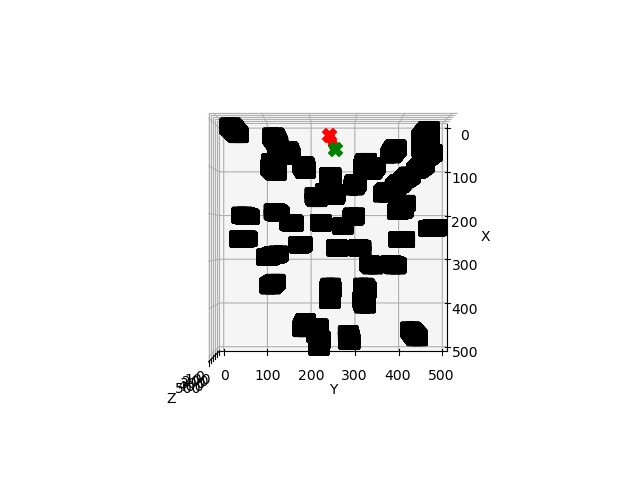

In [39]:
%matplotlib widget

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
import random
from IPython.display import clear_output
import os
import time
import scipy.io as sio
import itertools
from ipynb.fs.full.shared_functions import mutate_random, crossover_sp, crossover_uniform, crossover_mp, get_permutations, concatenate, mutate_swap, mutate_inversion, termination_check
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.close()

data_dict = sio.loadmat(r'C:\Users\ben\OneDrive - University of Bath\5th year\FYP\Simulation Development\Working Copies\MATLAB\MyWork\cuboids2.mat')  # Load the .mat file into a dictionary
my_data = data_dict['array']

environment=my_data

minimum_bs=1

# start_point=(10,10,19)
# goal_point=(55,75,1)

flag=0

while not flag:
    x1, x2 = np.random.randint(low=0, high=environment.shape[0], size=2)
    y1, y2 = np.random.randint(low=0, high=environment.shape[1], size=2)
    z1, z2 = np.random.randint(low=0, high=environment.shape[2], size=2)

    start_point=(x1,y1,z1)
    goal_point=(x2,y2,z2)

    if environment[x1,y1,z1] !=0 and environment[x2,y2,z2] !=0:
        flag = 1


plt.close()

# Create a 3D scatter plot with colors representing the values of the array
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

indices = np.argwhere(environment < minimum_bs)

#scatter obstacles (dont display free space as too much computation)
ax.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='x')

# Get the points on the line
points = list(bresenham_line_3d(*start_point, *goal_point))

# Print the list of points
# print(points)

# Plot the points on the line
ax.scatter([p[0] for p in points], [p[1] for p in points], [p[2] for p in points], c='r', marker='x')

# Plot the start and end points
ax.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
ax.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)

#set axes limits
ax.set_xlim3d(0, environment.shape[0])
ax.set_ylim3d(0, environment.shape[1])
ax.set_zlim3d(0, environment.shape[2])

#set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=90, azim=0)
# ax.set_box_aspect([1, 1, 0.05])


plt.show()

Display map start, goal and shortest route as the crow flies

Display Population

Average length of individuals: 1.5


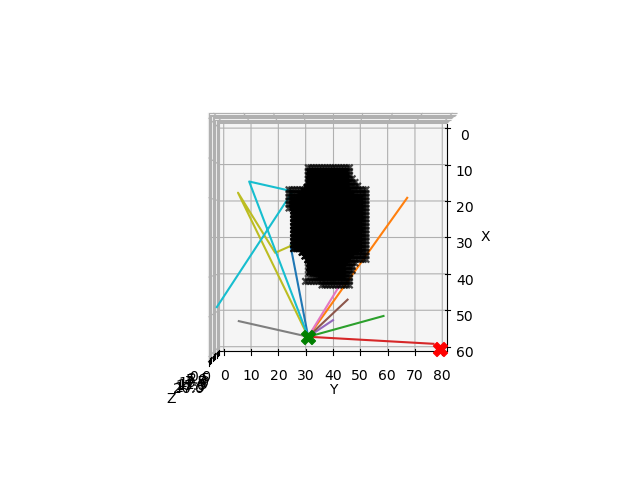

In [15]:
%matplotlib widget

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

POPULATION_SIZE=10
GENE_LENGTH=5
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.5
NUM_GENERATIONS = 100

timeout=60

# start_point=(5,180,45)
# goal_point=(175,50,89)

def generate_3d_population():
    # Generate the initial population
    population=[]

    for i in range(POPULATION_SIZE):

        # population.append(generate_individual(i))

        # population.append(generate_individual_2(i,_))

        # population.append(generate_individual_3(i,timeout))

        population.append(generate_individual_4(i,timeout))


        if population[-1]==0:
            print(f"\nTime Limit reached")
            break

    return population

population=generate_3d_population()

total_length = 0
for sublist in population:
    total_length += len(sublist)

avg_length = total_length / len(population)

clear_output()

print("Average length of individuals:", avg_length)

# population.append([(55, 16, 0), (55, 22, 5), (55, 40, 7), (55, 50, 9), (55, 65, 18)])

plt.close()

# Create a 3D scatter plot with colors representing the values of the array
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

indices = np.argwhere(environment < minimum_bs)

#scatter obstacles (dont display free space as too much computation)
ax.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='x')

try:
    for individual in population:

        individual.insert(0,start_point)

        individual_full=individual.copy()

        ax.plot(*zip(*individual_full))

    plt.show
except:
    pass

# Plot the start and end points
ax.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
ax.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)

#set axes limits
ax.set_xlim3d(0, environment.shape[0])
ax.set_ylim3d(0, environment.shape[1])
ax.set_zlim3d(0, environment.shape[2])

#set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=90, azim=0)

plt.show()


Main Script 3D

In [16]:
# Define the main function that runs the genetic algorithm
def main(Inputs):

    global POPULATION_SIZE,GENE_LENGTH,CROSSOVER_RATE,MUTATION_RATE,NUM_GENERATIONS,OPTIMAL_SOLUTION,OPTIMAL_FITNESS,COUNTER
    
    POPULATION_SIZE,GENE_LENGTH,CROSSOVER_RATE,MUTATION_RATE,NUM_GENERATIONS=Inputs

    POPULATION_SIZE, GENE_LENGTH, NUM_GENERATIONS = map(round, (POPULATION_SIZE, GENE_LENGTH, NUM_GENERATIONS))

    clear_output()

    print(f"Attempting Number: {COUNTER+1} / {dual_annealing_iterations}")

    COUNTER+=1

    timeout=100

    # Generate the initial population
    print(f"Generating Population...")

    population=[]

    for i in range(POPULATION_SIZE):

        population.append(generate_individual_4(i,timeout))

        if population[-1]==0:
            print(f"\nTime Limit reached")
            print(f"\n-----------------------------")

            return 1

    # population.append([(55, 16, 0), (55, 22, 5), (55, 40, 7), (55, 50, 9), (55, 65, 18)])

    # display_population(population)

    global_best=0
    average_fitness=[]

    print(f"\nEvolving Population...")

    start=time.time()

    termination_flag=0

    generation=0

    while termination_flag==0:

        generation+=1
        # Select parents
        parents, fitnesses, usable_path_fitness, usable_paths = select_parents_sus(population, start_point, goal_point)

        if parents==0:
            return 1

        # Print the best individual in this generation
        best_fitness_index=usable_path_fitness.index(max(usable_path_fitness))

        best_individual = usable_paths[best_fitness_index][0]

        best_individual=concatenate(start_point,goal_point,best_individual)
        average_fitness.append((sum(fitnesses)/len(fitnesses)))

        # print(f"Generation {generation + 1}: {best_individual}, Fitness: {usable_path_fitness[best_fitness_index]}")

        if usable_path_fitness[best_fitness_index]>global_best:
            global_best=usable_path_fitness[best_fitness_index]
            best_solution=best_individual

        
        if generation==0:
            print(f"\nGeneration {generation}/{NUM_GENERATIONS}: Average Fitness =  {average_fitness[-1]}, Best Fitness = {global_best}", end='\r')
        else:
            print(f"Generation {generation}/{NUM_GENERATIONS}: Average Fitness =  {average_fitness[-1]}, Best Fitness = {global_best}", end='\r')

        # Create the next generation by crossover and mutation
        next_generation = []
        for i in range(0, POPULATION_SIZE, 2):
            parent1 = parents[0]
            parent2 = parents[1]
            child1, child2 = crossover_mp(parent1, parent2, CROSSOVER_RATE, GENE_LENGTH)
            child1 = mutate_inversion(child1, MUTATION_RATE, GENE_LENGTH, environment, dimensions=3)
            child2 = mutate_inversion(child2, MUTATION_RATE, GENE_LENGTH, environment, dimensions=3)
            next_generation.append(child1)
            next_generation.append(child2)

        # Replace the current population with the next generation
        population = next_generation

        current_time=round((time.time()-start),5)

        termination_flag=termination_check(generation,current_time,average_fitness,NUM_GENERATIONS, TIME_LIMIT_GA,STAGNATION_NUM,method='generations')

    # return global_best, best_solution, average_fitness

    # Plot the environment and optimal path in 3D and 2D, also plot average fitness vs generation
    # plt.close()

    # fig1 = plt.figure()
    # ax = fig1.add_subplot(111, projection='3d')
    # x, y = np.meshgrid(np.arange(environment.shape[0]), np.arange(environment.shape[1]))
    # ax.plot_surface(x, y, environment, cmap='terrain')
    # xs, ys = zip(*best_solution)
    # ax.plot(xs, ys, color='red', linewidth=2)
    # plt.scatter(start_point[0], start_point[1], 0, marker='x')

    # fig2 = plt.figure()
    # bx = fig2.add_subplot(111)
    # # bx.title(f'Fitness= {round(global_best)}')
    # bx.imshow(my_data, cmap='hot', interpolation='nearest')
    # bx.scatter(start_point[0],start_point[1],marker="x", c="green")
    # bx.scatter(goal_point[0],goal_point[1],marker="x", c="red")
    # bx.plot(*zip(*best_solution))

    # fig3 = plt.figure()
    # cx = fig3.add_subplot(111)
    # # bx.title(f'Average Fitness vs Generation')
    # cx.plot(average_fitness)

    # plt.show()
    # print("/n")

    if global_best>OPTIMAL_FITNESS:
        OPTIMAL_FITNESS=global_best
        OPTIMAL_SOLUTION=best_solution

    return 1/global_best
    

Run Main Script once

Attempting Number: 1 / 1
Generating Population...
100 / 100 individuals generated: 0.01726 Seconds elapsed
Evolving Population...
Generation 10/10: Average Fitness =  24.658881996750814, Best Fitness = 29.03769151182527
Post Processing was beneficial: False


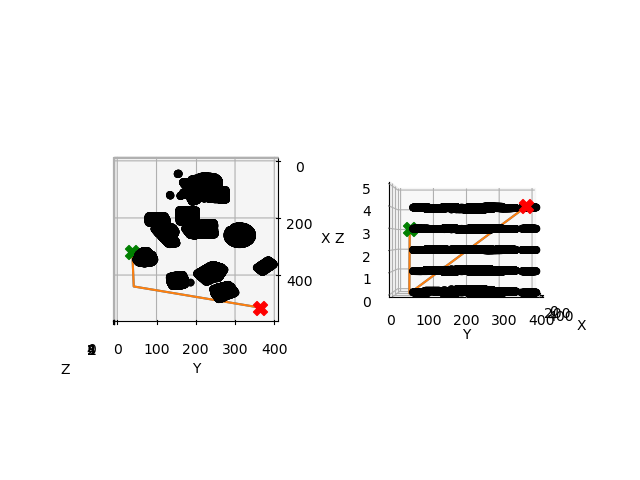

In [38]:
%matplotlib widget

POPULATION_SIZE=100
GENE_LENGTH=5
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.5
NUM_GENERATIONS = 10

OPTIMAL_FITNESS=0
COUNTER=0
TIME_LIMIT_GA=0.5
STAGNATION_NUM=5
OPTIMAL_SOLUTION=[]

dual_annealing_iterations=1

Inputs=(POPULATION_SIZE,GENE_LENGTH,CROSSOVER_RATE,MUTATION_RATE,NUM_GENERATIONS)

result = main(Inputs)

max_fitness,final_solution = post_processing(OPTIMAL_SOLUTION)

if OPTIMAL_SOLUTION!=[]:

    # plt.close()

    # Create a 3D scatter plot with colors representing the values of the array
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    indices = np.argwhere(environment < minimum_bs)

    # Scatter obstacles (don't display free space as too much computation)
    ax1.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='o', alpha=0.5)
    ax2.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='o', alpha=0.5)

    ax1.plot(*zip(*OPTIMAL_SOLUTION), zorder=1)
    ax2.plot(*zip(*OPTIMAL_SOLUTION), zorder=1)

    ax1.plot(*zip(*final_solution), zorder=1)
    ax2.plot(*zip(*final_solution), zorder=1)

    # Plot the start and end points
    ax1.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
    ax1.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)
    ax2.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
    ax2.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)

    # Set axes limits
    ax1.set_xlim3d(0, environment.shape[0])
    ax1.set_ylim3d(0, environment.shape[1])
    ax1.set_zlim3d(0, environment.shape[2])
    ax2.set_xlim3d(0, environment.shape[0])
    ax2.set_ylim3d(0, environment.shape[1])
    ax2.set_zlim3d(0, environment.shape[2])

    # Set axes labels
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    # Set viewpoint
    ax1.view_init(elev=90, azim=0)
    ax2.view_init(elev=0, azim=0)

    ax1.set_box_aspect([1, 1, 0.05])

    print(f"\nPost Processing was beneficial: {len(OPTIMAL_SOLUTION)!=len(final_solution)}")

    plt.show()



Dual Annealing

In [18]:
# %matplotlib widget

# OPTIMAL_FITNESS=0
# COUNTER=0

# dual_annealing_iterations=5

# population_size_bounds=[100,500]
# gene_length_bounds=[2,10]

# crossover_rate_bounds=[0.6,0.9]
# muatation_rate_bounds=[0.01,0.5]
# num_generations_bounds=[50,100]

# bounds=[population_size_bounds,gene_length_bounds,crossover_rate_bounds,muatation_rate_bounds,num_generations_bounds]

# GA_params=dual_annealing(main,bounds,maxfun=dual_annealing_iterations)

# clear_output()

# plt.close()

# max_fitness,final_solution = post_processing(OPTIMAL_SOLUTION)

# # Create a 3D scatter plot with colors representing the values of the array
# fig = plt.figure()
# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122, projection='3d')

# indices = np.argwhere(environment < minimum_bs)

# # Scatter obstacles (don't display free space as too much computation)
# ax1.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='x')
# ax2.scatter(indices[:, 0], indices[:, 1], indices[:, 2], c='black', marker='x')

# ax1.plot(*zip(*OPTIMAL_SOLUTION))
# ax2.plot(*zip(*OPTIMAL_SOLUTION))

# ax1.plot(*zip(*final_solution))
# ax2.plot(*zip(*final_solution))

# # Plot the start and end points
# ax1.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
# ax1.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)
# ax2.scatter(start_point[0], start_point[1], start_point[2], c='g', marker='X', s=100)
# ax2.scatter(goal_point[0], goal_point[1], goal_point[2], c='r', marker='X', s=100)

# # Set axes limits
# ax1.set_xlim3d(0, environment.shape[0])
# ax1.set_ylim3d(0, environment.shape[1])
# ax1.set_zlim3d(0, environment.shape[2])
# ax2.set_xlim3d(0, environment.shape[0])
# ax2.set_ylim3d(0, environment.shape[1])
# ax2.set_zlim3d(0, environment.shape[2])

# # Set axes labels
# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_zlabel('Z')
# ax2.set_xlabel('X')
# ax2.set_ylabel('Y')
# ax2.set_zlabel('Z')

# # Set viewpoint
# ax1.view_init(elev=90, azim=0)
# ax2.view_init(elev=0, azim=0)

# plt.show()

# print('Best Result  = ', 1/(GA_params.fun))
# print('POPULATION_SIZE  = ', round(GA_params.x[0]),', GENE_LENGTH = ', round(GA_params.x[1]), ', CROSSOVER_RATE= ', GA_params.x[2], ', MUTATION_RATE = ', GA_params.x[3], ', NUM_GENERATIONS =', round(GA_params.x[4]))
